### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a professional style for the plots
sns.set_theme(style="darkgrid")

### Load the Data Files

In [2]:
# Define the directory where your stats are saved
STATS_DIR = "prometheus-stats"

# Load each CSV file into a pandas DataFrame
try:
    df_rps = pd.read_csv(os.path.join(STATS_DIR, 'baseline_rps_per_pod.csv'))
    df_latency = pd.read_csv(os.path.join(STATS_DIR, 'baseline_p99_latency_per_pod_ms.csv'))
    df_cpu = pd.read_csv(os.path.join(STATS_DIR, 'baseline_cpu_usage_per_pod_cores.csv'))
    df_errors = pd.read_csv(os.path.join(STATS_DIR, 'baseline_error_rate_5xx_total.csv'))
    print("All data files loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure the script is in the same directory as the 'prometheus-stats' folder.")

All data files loaded successfully!


### Prepare the Data

In [3]:
def prepare_dataframe(df):
    # Convert timestamp column to datetime objects
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Shorten the long pod/workload names for cleaner plot legends
    if 'pod' in df.columns:
        # Extracts 'v1', 'v2', 'v3' from names like 'product-service-v1-deployment' or 'product-service-v1-deployment-xxxxx'
        df['version'] = df['pod'].str.extract(r'(v\d+)')
    return df

df_rps = prepare_dataframe(df_rps)
df_latency = prepare_dataframe(df_latency)
df_cpu = prepare_dataframe(df_cpu)
df_errors['timestamp'] = pd.to_datetime(df_errors['timestamp'])

### Visualize Requests Per Second (RPS)

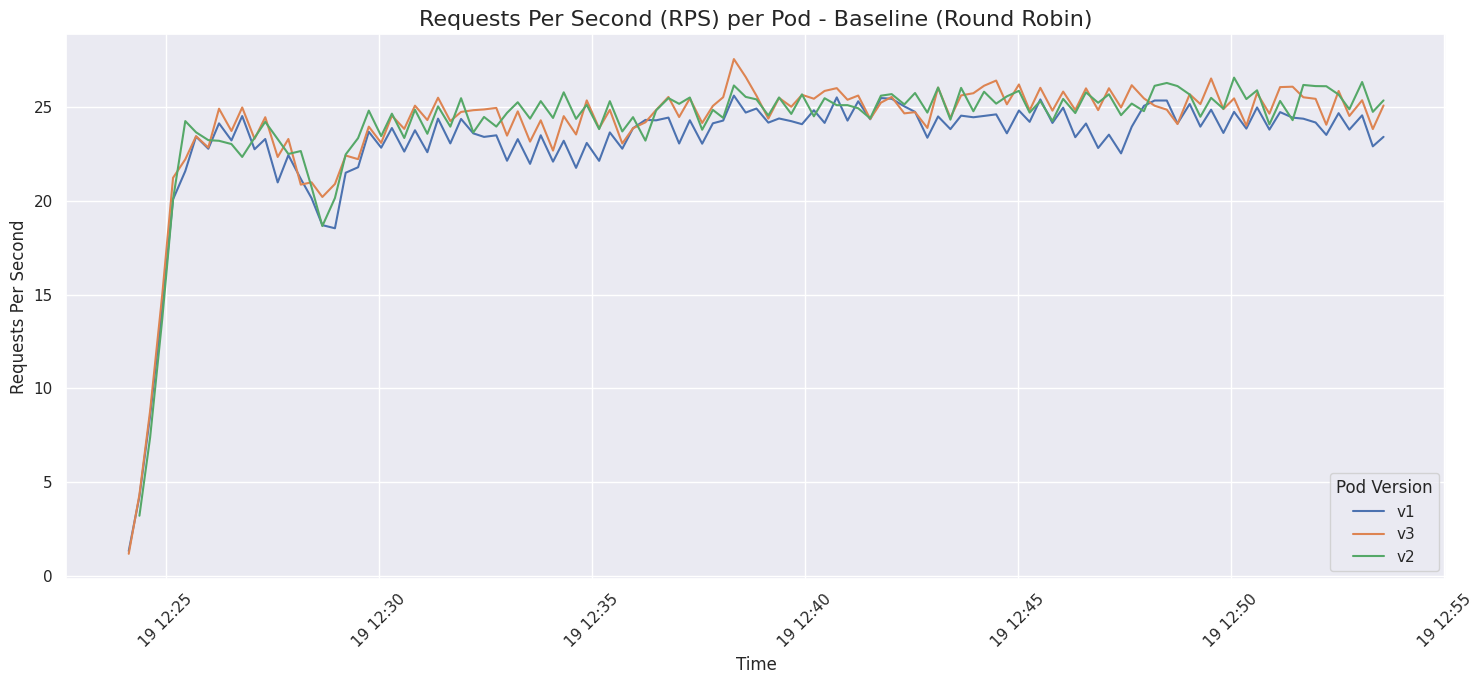

In [4]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_rps, x='timestamp', y='value', hue='version')

plt.title('Requests Per Second (RPS) per Pod - Baseline (Round Robin)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Requests Per Second', fontsize=12)
plt.legend(title='Pod Version')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure to a file for your thesis report
plt.savefig(os.path.join(STATS_DIR, 'baseline_rps_graph.png'))

plt.show()

### Visualize P99 Latency

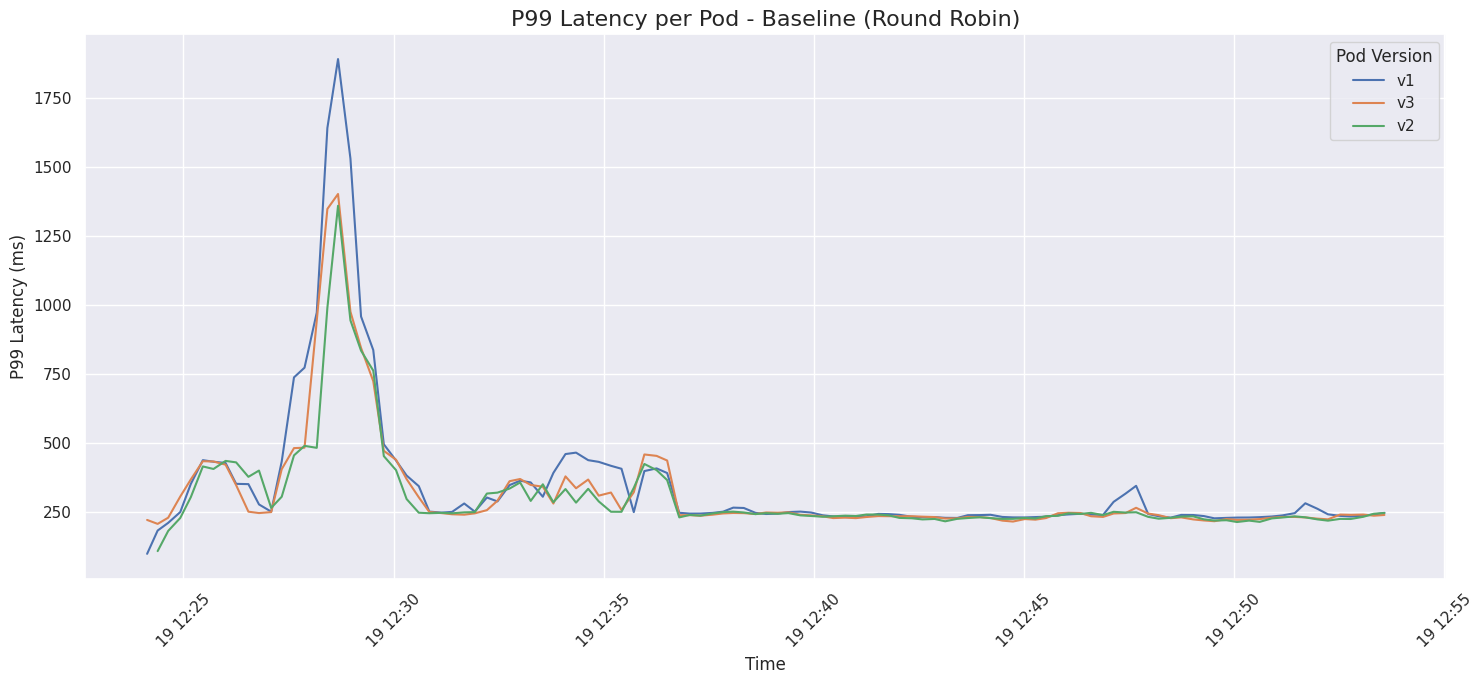

In [5]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_latency, x='timestamp', y='value', hue='version')

plt.title('P99 Latency per Pod - Baseline (Round Robin)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('P99 Latency (ms)', fontsize=12)
plt.legend(title='Pod Version')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(STATS_DIR, 'baseline_latency_graph.png'))

plt.show()

### Visualize CPU Usage

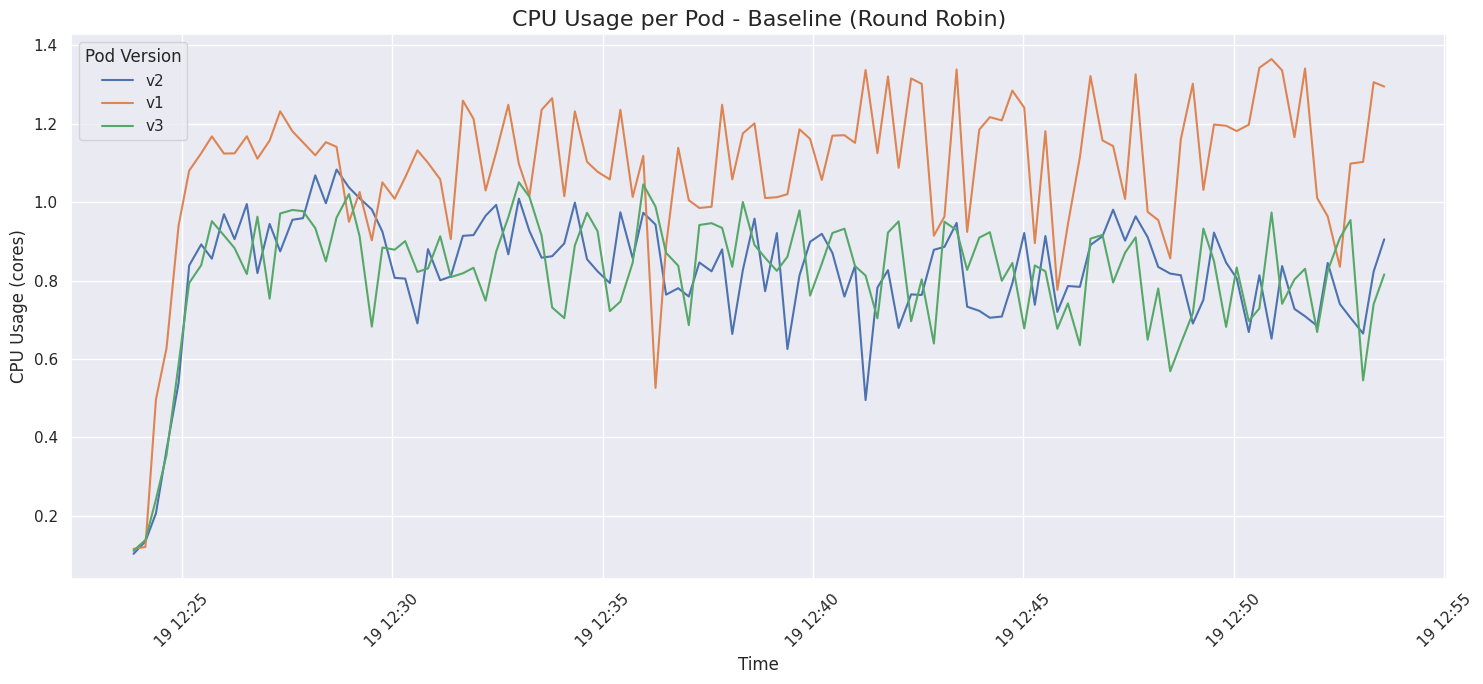

In [6]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_cpu, x='timestamp', y='value', hue='version')

plt.title('CPU Usage per Pod - Baseline (Round Robin)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('CPU Usage (cores)', fontsize=12)
plt.legend(title='Pod Version')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(STATS_DIR, 'baseline_cpu_graph.png'))

plt.show()

### Calculate and Display Summary Statistics

In [8]:
# Calculate average RPS for each pod version
avg_rps = df_rps.groupby('version')['value'].mean().reset_index()
print("--- Average Requests Per Second (RPS) ---")
print(avg_rps)
print("\n" + "="*40 + "\n")

# Calculate average P99 Latency for each pod version
avg_latency = df_latency.groupby('version')['value'].mean().reset_index()
print("--- Average P99 Latency (ms) ---")
print(avg_latency)
print("\n" + "="*40 + "\n")

# Calculate average CPU Usage for each pod version
avg_cpu = df_cpu.groupby('version')['value'].mean().reset_index()
print("--- Average CPU Usage (cores) ---")
print(avg_cpu)
print("\n" + "="*40 + "\n")

# Calculate total number of 5xx errors
total_errors = df_errors['value'].sum()
print(f"--- Total 5xx Errors ---")
print(f"Total server errors during the experiment: {total_errors}")

--- Average Requests Per Second (RPS) ---
  version      value
0      v1  23.049694
1      v2  24.160126
2      v3  23.987650


--- Average P99 Latency (ms) ---
  version       value
0      v1  343.923810
1      v2  300.913595
2      v3  313.817281


--- Average CPU Usage (cores) ---
  version     value
0      v1  1.088223
1      v2  0.819254
2      v3  0.817858


--- Total 5xx Errors ---
Total server errors during the experiment: 0.1058614786335983
